# Litteraturbanken Plats 
version 0.10  

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Plats.ipynb) /[nbviewer](https://nbviewer.jupyter.org/github/salgo60/open-data-examples/blob/master/Litteraturbanken%20Plats.ipynb)
  * [video](https://youtu.be/mQIFQc_jV1Y) "Wikidata Litteraturbanken platser"
* Task [T273156](https://phabricator.wikimedia.org/T273156) "Litteraturbanken karta"
* [Wikidata:WikiProject_Sweden/The_Swedish_Literature_bank](https://www.wikidata.org/wiki/Wikidata:WikiProject_Sweden/The_Swedish_Literature_bank)

#### Other sources we sync
* [Kulturpersoner Uppsalakyrkogård](https://github.com/salgo60/open-data-examples/blob/master/Check%20WD%20kulturpersoner%20uppsalakyrkogardar.ipynb)
* [Litteraturbanken](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb) 
  * WD property [P5101](https://www.wikidata.org/wiki/Property_talk:P5101) [P5123](https://www.wikidata.org/wiki/Property_talk:P5123)
* [Nobelprize.org](https://github.com/salgo60/open-data-examples/blob/master/Nobel%20API.ipynb)
  * WD [property 8024](https://www.wikidata.org/wiki/Property:P8024)
* [SBL](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb) 
  * WD [property 3217](https://www.wikidata.org/wiki/Property:P3217) 
* [SKBL](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)
  * WD [property 4963](https://www.wikidata.org/wiki/Property:P4963)
* [Svenska Akademien](https://github.com/salgo60/open-data-examples/blob/master/Svenska%20Akademien.ipynb) 
  * WD [property 5325](https://www.wikidata.org/wiki/Property:P5325) 

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "https://litteraturbanken.se/litteraturkartan/api/Directus/items/article2?filter[status][eq]=published&limit=10000&fields=*,placeid"
r = http.request('GET', url)
data = json.loads(r.data)
df = pd.DataFrame(data["data"])

In [3]:
df.head()

,id,status,owner,created_on,sort,modified_by,modified_on,header,free_text,placeid,lb,titleurl,title,startyear,endyear,authorid,author,imgurl,category,media_file,wikidata_person_id,article_author,article_author_prefix,red_additions,prio
0,1,published,1,2020-12-10T10:40:27+00:00,None,2,2021-01-13T14:36:18+00:00,En sagans och visans man,<p>Arvid August Afzelius (1785&ndash;1871) pos...,1,True,https://litteraturbanken.se/författare/Afzeliu...,,1785,1871,AfzeliusAA,"Afzelius, Arvid August",,Person,186,None,Erik Andersson,None,"<p>Fotografiet, som är taget av Nils Edvard Fo...",NaN
1,2,published,1,2020-12-10T10:40:28+00:00,None,2,2021-01-21T10:34:50+00:00,Skandaltelegrafisten,"<p>Hilma Angered-Strandberg, som mot slutet av...",2,True,,,,,AngeredStrandbergH,"Angered-Strandberg, Hilma",,Plats,234,None,Lotta Lotass,None,"<p>Bilden, som föreställer Falköpings station ...",NaN
2,3,published,1,2020-12-10T10:40:28+00:00,None,2,2021-01-13T07:29:27+00:00,En själs historia,"<p>""Hon f&ouml;ddes p&aring; en s&ouml;ndag, j...",3,True,https://litteraturbanken.se/författare/Angered...,Lydia Vik. En själs historia,1904,1904,AngeredStrandbergH,"Angered-Strandberg, Hilma",,Verk,229,None,Erik Andersson,None,<p><em>Lyssna till Ingrid Elam som läser Anger...,NaN
3,4,published,1,2020-12-10T10:40:28+00:00,None,4,2021-01-26T12:40:52+00:00,Skandalernas Hilma,<p>Provinsrealismens svårigheter illustreras k...,4,True,,,1855,1927,AngeredStrandbergH,"Angered-Strandberg, Hilma",,Person,232,None,Gunnar D Hansson,None,<p><em>Läs Hilma Angered Strandbergs verk hos ...,NaN
4,5,published,1,2020-12-10T10:40:29+00:00,None,4,2021-01-27T13:52:00+00:00,Fjällbacka hos Litteraturbanken,<p>De här träffarna kommer upp när man söker p...,4,True,,,,,,,,Plats,77,None,,None,"<p><em>Bilden har vi lånat från <a href=""https...",NaN


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     512 non-null    int64  
 1   status                 512 non-null    object 
 2   owner                  512 non-null    int64  
 3   created_on             512 non-null    object 
 4   sort                   0 non-null      object 
 5   modified_by            512 non-null    int64  
 6   modified_on            512 non-null    object 
 7   header                 512 non-null    object 
 8   free_text              512 non-null    object 
 9   placeid                512 non-null    int64  
 10  lb                     512 non-null    bool   
 11  titleurl               379 non-null    object 
 12  title                  373 non-null    object 
 13  startyear              446 non-null    object 
 14  endyear                445 non-null    object 
 15  author

In [5]:
df.describe() 

,id,owner,modified_by,placeid,media_file,prio
count,512.000000,512.000000,512.000000,512.000000,512.000000,22.000000
mean,277.796875,1.578125,2.185547,232.441406,214.632812,6.772727
std,159.283578,0.949688,0.595766,139.301910,92.869761,3.220941
min,1.000000,1.000000,1.000000,1.000000,17.000000,0.000000
25%,136.750000,1.000000,2.000000,107.750000,135.000000,5.000000
50%,282.500000,1.000000,2.000000,243.500000,206.500000,8.000000
75%,419.250000,2.000000,2.000000,353.000000,301.000000,9.000000
max,548.000000,4.000000,4.000000,476.000000,368.000000,10.000000


In [6]:
df.category.value_counts()

Person         172
Plats          101
Linnés resa     96
Verk            88
Resa            51
Name: category, dtype: int64

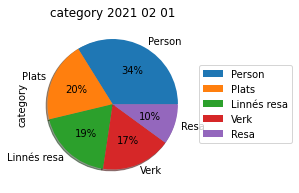

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt   
plotCategory = df.category.value_counts()  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "category " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [8]:
df.authorid.value_counts()[:30]

LinnéCvon             104
                       39
TörnqvistP             21
TaubeE                 16
HanssonGD              14
AlmqvistCJL            11
WollstonecraftM        11
WideAG                  9
LagerlöfS               9
WedelK                  8
NordströmL              7
AnderssonD              7
EdfeltJ                 6
HasselskogN             4
WennerbergG             4
AngeredStrandbergH      4
RydbergV                4
BoyeK                   4
Anonym                  4
ErfurthS                3
ElkanS                  3
ThorildT                3
LinnerhielmJC           3
AroseniusI              3
FlygareCarlénE          3
SpolénE                 3
LindqvistE              3
KnorringS               3
EhrenborgPosseB         2
CarlénJG                2
Name: authorid, dtype: int64

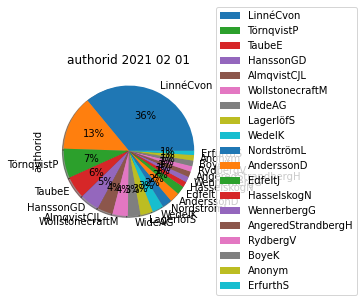

In [9]:
plotCategory = df.authorid.value_counts()[:20]  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "authorid " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [10]:
df.article_author.value_counts()

Erik Andersson      241
Lilian Perme         50
Dick Claésson        46
Gunnar D Hansson     33
Peter Törnqvist      21
Paulina Helgeson      9
Kristian Wedel        8
                      8
Lotta Lotass          3
Cai Alfredson         2
Jonas Ellerström      2
Name: article_author, dtype: int64

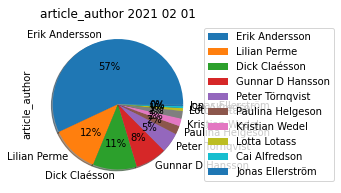

In [11]:
plotCategory = df.article_author.value_counts()[:20]  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "article_author " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [12]:
df.wikidata_person_id.value_counts() 

Q4952353    2
Q5615947    1
Q5808708    1
Q4941859    1
Q4990447    1
Name: wikidata_person_id, dtype: int64

In [13]:
import pandas_profiling as pp
eda = pp.ProfileReport(df)
display(eda)

#### Coordinates missing


In [14]:
url_coord = "https://red.litteraturbanken.se/api/query/vastsvenska?to=900&search=%7B%22query%22:%7B%22bool%22:%7B%22filter%22:%7B%22term%22:%7B%22status%22:%22published%22%7D%7D,%22must%22:[%7B%22query_string%22:%7B%22query%22:%22av%22,%22fields%22:[%22author%22,%22author.search%22,%22article_author%22,%22article_author.search%22,%22header%5E1.8%22,%22placeaddress%5E1.5%22,%22placename%5E1.5%22,%22free_text%22,%22author.search%22,%22header.search%22,%22placeaddress.search%22,%22placename.search%22,%22free_text.search%22,%22lb_author.full_name%5E10%22,%22lb_author.full_name.search%22],%22default_operator%22:%22and%22,%22type%22:%22cross_fields%22%7D%7D]%7D%7D,%22highlight%22:%7B%22order%22:%22score%22,%22number_of_fragments%22:3,%22boundary_chars%22:%22.,!%3F+%5Ct%5Cn%3C%3E%3B%22,%22fragment_size%22:100,%22fields%22:%7B%22*%22:%7B%7D%7D%7D%7D"
url_coord = "https://red.litteraturbanken.se/api/query/vastsvenska?to=900&search=%7B%22query%22:%7B%22bool%22:%7B%22filter%22:%7B%22term%22:%7B%22status%22:%22published%22%7D%7D,%22must%22:[%7B%22query_string%22:%7B%22query%22:%22av%22,%22fields%22:[%22author%22,%22author.search%22,%22article_author%22,%22article_author.search%22,%22header%5E1.8%22,%22placeaddress%5E1.5%22,%22placename%5E1.5%22,%22free_text%22,%22author.search%22,%22header.search%22,%22placeaddress.search%22,%22placename.search%22,%22free_text.search%22,%22lb_author.full_name%5E10%22,%22lb_author.full_name.search%22],%22default_operator%22:%22and%22,%22type%22:%22cross_fields%22%7D%7D]%7D%7D,%22highlight%22:%7B%22order%22:%22score%22,%22number_of_fragments%22:3,%22boundary_chars%22:%22.,!%3F+%5Ct%5Cn%3C%3E%3B%22,%22fragment_size%22:100,%22fields%22:%7B%22*%22:%7B%7D%7D%7D%7D"
                                                        
r_coord = http.request('GET', url_coord)
data_coord = json.loads(r_coord.data)
df_coord = pd.DataFrame(data_coord["data"])
df_coord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   article_author         246 non-null    object 
 1   article_author_prefix  13 non-null     object 
 2   author                 126 non-null    object 
 3   authorid               223 non-null    object 
 4   category               316 non-null    object 
 5   created_on             319 non-null    object 
 6   endyear                255 non-null    object 
 7   free_text              319 non-null    object 
 8   header                 319 non-null    object 
 9   highlight              319 non-null    object 
 10  id                     319 non-null    int64  
 11  imgurl                 89 non-null     object 
 12  lb                     319 non-null    bool   
 13  media_file             319 non-null    object 
 14  modified_by            319 non-null    object 
 15  modifi

In [15]:
df_coord.sample(6)

,article_author,article_author_prefix,author,authorid,category,created_on,endyear,free_text,header,highlight,id,imgurl,lb,media_file,modified_by,modified_on,owner,placeaddress,placecoord,placeid,placename,red_additions,sort,startyear,status,title,titleurl,wikidata_person_id,lb_author,prio
57,Erik Andersson,None,Rudolf Kjellén,,Person,2020-12-10T10:41:12+00:00,1922,Rudolf Kjellén växte upp i ett prästhem på Tor...,En geopolitisk västgöte,{'free_text': ['och analyser <em>av</em> samti...,198,,False,{'id': 178},{'id': 2},2021-01-13T14:36:10+00:00,{'id': 1},,"{'lat': '57.6986', 'lon': '11.9713'}",178,Göteborg: högskolan,"<p>Fotografiet, som är taget av Nils Edvard Fo...",None,1864,published,,,None,NaN,NaN
238,None,None,None,None,Plats,2021-01-15T14:17:00+00:00,None,De här träffarna kommer upp när man söker på H...,Högsäter hos Litteraturbanken,{'free_text': ['När du har tröttnat på att läs...,493,None,False,{'id': 301},{'id': 2},2021-01-27T14:01:20+00:00,{'id': 2},None,"{'lat': 58.64600216081153, 'lon': 12.049641609...",356,Högsäter,None,None,None,published,None,None,None,NaN,NaN
2,Lilian Perme,None,Thorbjörn Hwass,None,Person,2020-12-10T10:41:44+00:00,1927,Thorbjörn Hwass (1852–1927) var prästson född ...,Läkaren som längtade till författarlivet,{'free_text': ['Att Thorbjörn Hwass gärna hade...,341,None,False,{'id': 204},{'id': 2},2021-01-21T10:37:37+00:00,{'id': 1},None,"{'lat': 59.09792892813488, 'lon': 12.646636962...",333,Mo kyrka,"<p>Fotografiet, som är taget av Petrus Johanss...",None,1852,published,None,None,None,NaN,NaN
283,Peter Törnqvist,None,None,TörnqvistP,Resa,2020-12-18T14:19:37+00:00,2016,”Kyrkogården i ISTORP märkvärdigt nog nutans t...,Tog nattläger i ena byscha (2016),{'free_text.search': ['otvivelaktige tankar: ”...,443,None,True,{'id': 279},{'id': 2},2021-01-27T13:34:14+00:00,{'id': 2},None,"{'lat': '57.337315411623706', 'lon': '12.49809...",404,Istorp,"<p><a href=""?id=405&amp;article=444"" target=""_...",None,2016,published,Kal från Linnés urtima resa,https://litteraturbanken.se/forfattare/Tornqvi...,None,"{'authorid': 'TörnqvistP', 'authorid_norm': 'T...",NaN
147,,None,,,Verk,2020-12-10T10:40:34+00:00,,”Det sägs att kung Olav sommaren därpå for på ...,En vålnad på dasset,{'free_text': ['På kvällen när folket satt vid...,35,,True,{'id': 339},{'id': 2},2021-01-13T14:18:36+00:00,{'id': 1},,"{'lat': '57.9234', 'lon': '12.0226'}",38,Romelanda,<p><em>Lyssna till Gunnar D Hansson som 2019 l...,None,,published,Tåten om Thorstein Skräck,https://litteraturbanken.se/ljudochbild/2019/1...,None,NaN,NaN
182,Lilian Perme,None,None,FryxellO,Person,2020-12-17T11:48:36+00:00,1900,Olof Fryxell (1806–1900) var född i Edslekog. ...,"Utgivare, poet och kyrkoherde",{'free_text': ['Däremot förberedde han utgivni...,399,None,True,{'id': 333},{'id': 4},2021-01-26T09:30:57+00:00,{'id': 4},None,"{'lat': 59.054195491075596, 'lon': 12.46707916...",337,Edsleskog,<p>Läs Olof Fryxells dikt ”Svalorna” hos Litte...,None,1806,published,None,None,None,"{'authorid': 'FryxellO', 'authorid_norm': 'Fry...",NaN


In [16]:
latitude=[]
longitude=[]
for place in df_coord["City"]:
    geolocator = Nominatim(user_agent="tor_explorer")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
df['latitude']=latitude
df['longitude']=longitude

KeyError: 'City'

In [ ]:
import geopandas as gpd
import descartes
crs = {'init': 'epsg;4326'}

In [ ]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ass.ms) {}'.format(datetime.now() - start_time))